In [47]:
import requests
import bs4
import re
import pandas as pd
import os
from math import cos, asin, sqrt, pi
import datetime
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Part 1: Data Processing

In [46]:
TAXI_URL = "https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
# get HTML from main page
content = requests.get(TAXI_URL)
soup = bs4.BeautifulSoup(content.text, 'html.parser')

In [ ]:
# find all links on the main page
pattern = r"yellow_tripdata_20(0[0-9]|1[0-5])\-\d{2}.csv$"
links = [a['href'] for a in soup.find_all('a')]x

In [ ]:
# use regex to get only the yellow taxi links from 2009 - june 2015
new_list = []

for link in links:
    if re.search(pattern, link) is not None:
        mo_1 = link[-6]
        mo_2 = link[-5]
        if mo_1 == "1":
            new_list.append(link)
        elif int(mo_2) <= 6:
            new_list.append(link)

In [ ]:
# write csvs to files
i = 0

for link in new_list:
    print(i)
    i += 1
    req = requests.get(link)
    url_content = req.content
    
    csv_file = open('downloaded.csv', 'ab')
    csv_file.write(url_content)
    csv_file.close()

In [ ]:
# convert csv to df
entire_df = pd.read_csv("downloaded.csv")

**ADD CODE TO SAMPLE DATA**

In [546]:
# Load the sampled data
df = pd.read_csv('sampled.csv')

In [547]:
# We will clean the sampled data year by year. There are columns with different names showing the same types of data.
# We need to merge these columns together and delete the irrelevant columns
# From the given sample table we know there are 8 useful columns.

In [548]:
pd.set_option('display.max_columns', None)

In [549]:
# create a new datafram called cleaned
cleaned = pd.DataFrame()
# create new columns
pickup_datetime = []
fare_amount = []
pickup_longitude = []
pickup_latitude = []
dropoff_longitude = []
dropoff_latitude = []
passenger_count = []
tip = []

In [550]:
# clean the data from 2009
temp = df.iloc[0:14400]
pickup_datetime += list(temp['Trip_Pickup_DateTime'])
fare_amount += list(temp['Fare_Amt'])
pickup_longitude += list(temp['Start_Lon'])
pickup_latitude += list(temp['Start_Lat'])
dropoff_longitude += list(temp['End_Lon'])
dropoff_latitude += list(temp['End_Lat'])
passenger_count += list(temp['Passenger_Count'])
tip += list(temp['Tip_Amt'])

In [551]:
# clean the data from 2010
temp = df.iloc[14400:28800]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])
tip += list(temp['tip_amount'])

In [552]:
# clean the data from 2011
temp = df.iloc[28800:43200]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])
tip += list(temp['tip_amount'])

In [553]:
# clean the data from 2012
temp = df.iloc[43200:57600]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])
tip += list(temp['tip_amount'])

In [554]:
# clean the data from 2013
temp = df.iloc[57600:72000]
pickup_datetime += list(temp['pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])
tip += list(temp['tip_amount'])

In [555]:
# clean the data from 2014
temp = df.iloc[72000:86400]
pickup_datetime += list(temp.iloc[:, 36])
fare_amount += list(temp.iloc[:, 46])
pickup_longitude += list(temp.iloc[:, 39])
pickup_latitude += list(temp.iloc[:, 40])
dropoff_longitude += list(temp.iloc[:, 43])
dropoff_latitude += list(temp.iloc[:, 44])
passenger_count += list(temp.iloc[:, 37])
tip += list(temp.iloc[:, 49])

In [556]:
# clean the data from 2015
temp = df.iloc[86400:]
pickup_datetime += list(temp['tpep_pickup_datetime'])
fare_amount += list(temp['fare_amount'])
pickup_longitude += list(temp['pickup_longitude'])
pickup_latitude += list(temp['pickup_latitude'])
dropoff_longitude += list(temp['dropoff_longitude'])
dropoff_latitude += list(temp['dropoff_latitude'])
passenger_count += list(temp['passenger_count'])
tip += list(temp['tip_amount'])

In [557]:
# add all the clean columns to the clean table
cleaned['pickup_datetime'] = pickup_datetime
cleaned['fare_amount'] = fare_amount
cleaned['pickup_longitude'] = pickup_longitude
cleaned['pickup_latitude'] = pickup_latitude
cleaned['dropoff_longitude']= dropoff_longitude
cleaned['dropoff_latitude'] = dropoff_latitude
cleaned['passenger_count'] = passenger_count
cleaned['tips'] = tip

In [558]:
len(pickup_datetime)

93600

In [559]:
len(cleaned)

93600

In [560]:
# exclude data outside of nyc
cleaned = cleaned.loc[(cleaned['pickup_longitude'] > -74.24233) & (cleaned['pickup_longitude'] < -73.717047)]
cleaned = cleaned.loc[(cleaned['dropoff_longitude'] > -74.24233) & (cleaned['dropoff_longitude'] < -73.717047)]
cleaned = cleaned.loc[(cleaned['pickup_latitude'] > 40.560445) & (cleaned['pickup_latitude'] < 40.908524)]
cleaned = cleaned.loc[(cleaned['dropoff_latitude'] > 40.560445) & (cleaned['dropoff_latitude'] < 40.908524)]

In [561]:
# define a function to calculate the distance between coordinates
def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))

In [562]:
# testing the function
distance(40.751500, -73.984090, 40.770418, -73.864958)

10.251851855874952

In [563]:
# apply the function to table and add a new distance column
cleaned['distance'] = cleaned[['pickup_latitude','pickup_longitude','dropoff_latitude', 
                              'dropoff_longitude']].apply(lambda x: distance(*x), axis=1)

In [564]:
# define a function to extract the hour number
def hour_extract(x):
    return x[11:13]

In [565]:
# apply the function to table and add a new hour column
cleaned['hour'] = cleaned[['pickup_datetime']].apply(lambda x: int(hour_extract(*x)), axis=1)

In [566]:
uber = pd.read_csv('uber_rides_sample.csv')

In [567]:
# add distance column to uber table
uber['distance'] = uber[['pickup_latitude','pickup_longitude','dropoff_latitude', 
                              'dropoff_longitude']].apply(lambda x: distance(*x), axis=1)

In [568]:
# define a day conversion function
def day_conv(x):
    return datetime.datetime.strptime(x[:10], '%Y-%m-%d').strftime('%A')

In [569]:
# testing the function
day_conv(uber['pickup_datetime'][0])

'Thursday'

In [570]:
# apply the function to uber table and add a new day column
uber['day'] = uber[['pickup_datetime']].apply(lambda x: day_conv(*x), axis=1)

In [571]:
uber = uber.loc[(uber['pickup_longitude'] > -74.24233) & (uber['pickup_longitude'] < -73.717047)]
uber = uber.loc[(uber['dropoff_longitude'] > -74.24233) & (uber['dropoff_longitude'] < -73.717047)]
uber = uber.loc[(uber['pickup_latitude'] > 40.560445) & (uber['pickup_latitude'] < 40.908524)]
uber = uber.loc[(uber['dropoff_latitude'] > 40.560445) & (uber['dropoff_latitude'] < 40.908524)]

In [572]:
# clean the weather data

In [589]:
w14 = pd.read_csv('weather/2014_weather.csv')
w12 = pd.read_csv('weather/2012_weather.csv')
w2012 = w12

In [590]:
cleaned_14 = pd.DataFrame()
# select summary of day
day = []
windspeed = []

w2012 = w2012.loc[w2012['REPORT_TYPE'] == 'SOD  ']
day += list(w2012['DATE'])
windspeed += list(w2012['DailyAverageWindSpeed'])

w14 = w14.loc[w14['REPORT_TYPE'] == 'SOD  ']
day += list(w14['DATE'])
windspeed += list(w14['DailyAverageWindSpeed'])

cleaned_14['date'] = day
cleaned_14['windspeed'] = windspeed

In [591]:
# filter out summary of day
w12 = w12.loc[w12['REPORT_TYPE'] != 'SOD  ']
# filter out summary of month
w12 = w12.loc[w12['REPORT_TYPE'] != 'SOM  ']
# filter our half hour
mask = w12['DATE'].str.contains('51', case=False, na=False)
w12 = w12[mask]
# select sandy data
w12 = w12.loc[8407:8940]
sandy = pd.DataFrame()
sandy['DATE'] = w12['DATE']
sandy['precipitation'] = w12['HourlyPrecipitation']

In [592]:
os.makedirs('Github/4501-Project', exist_ok=True)  
cleaned.to_csv('cleaned.csv') 
uber.to_csv('uber.csv') 
cleaned_14.to_csv('daily_weather.csv') 
sandy.to_csv('sandy.csv') 
w2012.to_csv('2012_weather.csv') 

# Part 2: Storing Data

In [48]:
engine = create_engine(f'sqlite:///project.db', echo=True)
sqlite_connection = engine.connect()

In [49]:
# create yellow taxi sql table
yellow_taxi = pd.read_csv("cleaned.csv")
yellow_taxi.to_sql("yellow_taxi", engine)

2022-05-01 13:49:41,304 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("yellow_taxi")
2022-05-01 13:49:41,304 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'yellow_taxi' already exists.

In [50]:
# create uber sql table
uber_sql = pd.read_csv("uber.csv")
uber_sql.to_sql("uber", engine)

2022-05-01 13:49:41,899 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("uber")
2022-05-01 13:49:41,901 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'uber' already exists.

In [30]:
# create weather sql tables
daily_weather = pd.read_csv("daily_weather.csv")
daily_weather.to_sql("daily_weather", engine)

hourly_weather = pd.read_csv("sandy.csv")
hourly_weather.to_sql("hourly_weather", engine)

2022-05-01 13:36:13,272 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("daily_weather")
2022-05-01 13:36:13,274 INFO sqlalchemy.engine.Engine [raw sql] ()


ValueError: Table 'daily_weather' already exists.

# Part 3: Understanding Data

In [270]:
def write_query_to_file(query, outfile):
    f = open(outfile, "w")
    f.write(query)
    f.close()

## Q1) What hour is the most popular to take a yellow taxi?

In [315]:
QUERY_1 = """
SELECT "hour", count(hour)
    FROM "yellow_taxi"
    GROUP BY "hour"
"""

engine.execute(QUERY_1).fetchall()


2022-05-01 15:03:49,385 INFO sqlalchemy.engine.Engine 
SELECT "hour", count(hour)
    FROM "yellow_taxi"
    GROUP BY "hour"

2022-05-01 15:03:49,389 INFO sqlalchemy.engine.Engine [raw sql] ()


[(0, 3619),
 (1, 2671),
 (2, 2003),
 (3, 1447),
 (4, 1071),
 (5, 921),
 (6, 1832),
 (7, 3124),
 (8, 4192),
 (9, 4210),
 (10, 4150),
 (11, 4269),
 (12, 4399),
 (13, 4499),
 (14, 4669),
 (15, 4435),
 (16, 3908),
 (17, 4539),
 (18, 5566),
 (19, 5659),
 (20, 5443),
 (21, 5403),
 (22, 5006),
 (23, 4481)]

## A1) Hour 19 (7pm) is the most popular time of day to take a yellow taxi.

## Q2) What day is the most popular to take an Uber?

In [316]:
QUERY_2 = """
SELECT "day", count(day)
    FROM "uber"
    GROUP BY "day"
"""

engine.execute(QUERY_2).fetchall()

2022-05-01 15:03:58,217 INFO sqlalchemy.engine.Engine 
SELECT "day", count(day)
    FROM "uber"
    GROUP BY "day"

2022-05-01 15:03:58,226 INFO sqlalchemy.engine.Engine [raw sql] ()


[('Friday', 30166),
 ('Monday', 24681),
 ('Saturday', 29599),
 ('Sunday', 25834),
 ('Thursday', 29338),
 ('Tuesday', 27526),
 ('Wednesday', 28328)]

## A2) Friday is the most popular day to take an Uber.

## Q3) What is the 95% percentile of all trips in July 2013?

In [335]:
QUERY_3 = """
WITH "dists" AS (SELECT "distance" FROM "yellow_taxi" WHERE DATE("pickup_datetime")>"2013-06-30" AND DATE("pickup_datetime")<"2013-08-01"
    UNION ALL
    SELECT "distance" FROM "uber" WHERE DATE("pickup_datetime")>"2013-06-30" AND DATE("pickup_datetime")<"2013-08-01")
    
    SELECT * FROM "dists"
    ORDER BY "distance" ASC
    LIMIT 1
    OFFSET (SELECT
         COUNT(*)
        FROM "dists") * 95 / 100 - 1;
"""
engine.execute(QUERY_3).fetchall()

2022-05-01 15:11:45,818 INFO sqlalchemy.engine.Engine 
WITH "dists" AS (SELECT "distance" FROM "yellow_taxi" WHERE DATE("pickup_datetime")>"2013-06-30" AND DATE("pickup_datetime")<"2013-08-01"
    UNION ALL
    SELECT "distance" FROM "uber" WHERE DATE("pickup_datetime")>"2013-06-30" AND DATE("pickup_datetime")<"2013-08-01")
    
    SELECT * FROM "dists"
    ORDER BY "distance" ASC
    LIMIT 1
    OFFSET (SELECT
         COUNT(*)
        FROM "dists") * 95 / 100 - 1;

2022-05-01 15:11:45,821 INFO sqlalchemy.engine.Engine [raw sql] ()


[(9.63492562535863,)]

## A3) 9.63492562535863 is the 95th Percentile of Hired Rides in July 2013.

## Q4) Top Ten Hired Days + Average Distance in 2009?

In [274]:
QUERY_4 = """
    WITH "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2010-01-01"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "uber" WHERE DATE("pickup_datetime") < "2010-01-01"
    ),
    
    "topten" AS (
    SELECT "date", count(*) AS ct FROM "allrides"
    GROUP BY "date"
    ORDER BY ct DESC
    LIMIT 10
    )
    
    SELECT topten.date, AVG(allrides.distance) FROM "topten"
    JOIN "allrides" ON topten.date = allrides.date
    GROUP BY topten.date
    ORDER BY topten.ct DESC
"""
engine.execute(QUERY_4).fetchall()

2022-04-30 23:44:42,676 INFO sqlalchemy.engine.Engine 
    WITH "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2010-01-01"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date", "distance" FROM "uber" WHERE DATE("pickup_datetime") < "2010-01-01"
    ),
    
    "topten" AS (
    SELECT "date", count(*) AS ct FROM "allrides"
    GROUP BY "date"
    ORDER BY ct DESC
    LIMIT 10
    )
    
    SELECT topten.date, AVG(allrides.distance) FROM "topten"
    JOIN "allrides" ON topten.date = allrides.date
    GROUP BY topten.date
    ORDER BY topten.ct DESC

2022-04-30 23:44:42,677 INFO sqlalchemy.engine.Engine [raw sql] ()


[('2009-11-05', 3.1719834217745233),
 ('2009-02-21', 3.316772477787014),
 ('2009-12-04', 3.0355148277065496),
 ('2009-11-07', 2.4009012167001536),
 ('2009-06-12', 3.547049984955932),
 ('2009-07-16', 3.0812862084419277),
 ('2009-06-04', 3.455638454530586),
 ('2009-01-30', 3.100244793113854),
 ('2009-09-11', 2.8638414447764706),
 ('2009-04-20', 2.9070527972732476)]

## A4) Top 10 Hired Days + Average Distance:

 ('2009-11-05', 3.1719834217745233),

 ('2009-02-21', 3.316772477787014),
 
 ('2009-12-04', 3.0355148277065496),
 
 ('2009-11-07', 2.4009012167001536),
 
 ('2009-06-12', 3.547049984955932),
 
 ('2009-07-16', 3.0812862084419277),
 
 ('2009-06-04', 3.455638454530586),
 
 ('2009-01-30', 3.100244793113854),
 
 ('2009-09-11', 2.8638414447764706),
 
 ('2009-04-20', 2.9070527972732476).

## Q5) Windiest Days + # Hired Trips in 2014?

In [306]:
QUERY_5 = """
 WITH "windiest" AS (
   SELECT DATE("date") as "new_date", "windspeed" FROM "daily_weather" WHERE DATE("date") < "2015-01-01" AND DATE("date") > "2013-12-31"
   ORDER BY "windspeed" DESC
   LIMIT 10
   ),

 "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date" FROM "uber" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    ),
    
 "ridescount" AS (
     SELECT "date", COUNT("date") AS ct FROM "allrides"
     GROUP BY "date"
 )
 
  SELECT windiest.new_date, windiest.windspeed, ridescount.ct FROM "windiest"
     LEFT JOIN "ridescount" ON windiest.new_date = ridescount.date
     GROUP BY windiest.new_date
     ORDER BY windiest.windspeed DESC

"""
engine.execute(QUERY_5).fetchall()

2022-05-01 14:56:50,671 INFO sqlalchemy.engine.Engine 
 WITH "windiest" AS (
   SELECT DATE("date") as "new_date", "windspeed" FROM "daily_weather" WHERE DATE("date") < "2015-01-01" AND DATE("date") > "2013-12-31"
   ORDER BY "windspeed" DESC
   LIMIT 10
   ),

 "allrides" AS (
    SELECT DATE("pickup_datetime") AS "date" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "date" FROM "uber" WHERE DATE("pickup_datetime") < "2015-01-01" AND DATE("pickup_datetime") > "2013-12-31"
    ),
    
 "ridescount" AS (
     SELECT "date", COUNT("date") AS ct FROM "allrides"
     GROUP BY "date"
 )
 
  SELECT windiest.new_date, windiest.windspeed, ridescount.ct FROM "windiest"
     LEFT JOIN "ridescount" ON windiest.new_date = ridescount.date
     GROUP BY windiest.new_date
     ORDER BY windiest.windspeed DESC


2022-05-01 14:56:50,676 INFO sqlalchemy.engine.Engine [raw sql] ()


[('2014-03-13', 14.1, 45),
 ('2014-01-07', 13.1, 39),
 ('2014-02-13', 12.6, 22),
 ('2014-01-02', 12.2, 31),
 ('2014-03-26', 11.9, 39),
 ('2014-12-07', 11.8, 43),
 ('2014-12-08', 11.5, 42),
 ('2014-11-02', 10.8, 36),
 ('2014-03-29', 10.8, 35),
 ('2014-01-03', 10.4, 18)]

## A5) Top 10 Windiest Days + Windspeed + # Rides:
('2014-03-13', 14.1, 45)

 ('2014-01-07', 13.1, 39)
 
 ('2014-02-13', 12.6, 22)
 
 ('2014-01-02', 12.2, 31)
 
 ('2014-03-26', 11.9, 39)
 
 ('2014-12-07', 11.8, 43)
 
 ('2014-12-08', 11.5, 42)
 
 ('2014-11-02', 10.8, 36)
 
 ('2014-03-29', 10.8, 35)
 
 ('2014-01-03', 10.4, 18)

## Q6) Precipitation + # Rides + Windspeed Per Hour During the Week Before, During, and Week After Hurricane Sandy?

In [278]:
# oct 22 -- nov 6
QUERY_6 = """
WITH "precip" AS (
    SELECT DATE("DATE") AS "new_date", strftime("%H", "DATE") AS "hr", "precipitation" FROM "hourly_weather" WHERE DATE("DATE") < "2012-11-07" AND DATE("DATE") > "2012-10-21"
),
"rides" AS (
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "uber" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
),
"counted_rides" AS (
    SELECT "dt" AS "dt", "hr" AS "hr", COUNT(*) AS "ct" FROM "rides"
    GROUP BY "dt", "hr"
),
"rain_and_rides" AS (
    SELECT precip.new_date AS "dt", precip.hr AS "hr", precip.precipitation AS "rain", counted_rides.ct AS "rides" FROM "precip"
    LEFT JOIN "counted_rides" ON precip.new_date = counted_rides.dt AND precip.hr = counted_rides.hr
),
"wind" AS (
    SELECT DATE("date") AS "dt", "windspeed" FROM "daily_weather" WHERE DATE("date") < "2012-11-07" AND DATE("date") > "2012-10-21"
)

SELECT rain_and_rides.dt, rain_and_rides.hr, rain_and_rides.rain, rain_and_rides.rides, wind.windspeed FROM "rain_and_rides"
LEFT JOIN "wind" ON wind.dt = rain_and_rides.dt
"""
engine.execute(QUERY_6).fetchall()

2022-04-30 23:52:44,966 INFO sqlalchemy.engine.Engine 
WITH "precip" AS (
    SELECT DATE("DATE") AS "new_date", strftime("%H", "DATE") AS "hr", "precipitation" FROM "hourly_weather" WHERE DATE("DATE") < "2012-11-07" AND DATE("DATE") > "2012-10-21"
),
"rides" AS (
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "yellow_taxi" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
    UNION ALL
    SELECT DATE("pickup_datetime") AS "dt", strftime("%H", "pickup_datetime") AS "hr" FROM "uber" WHERE DATE("pickup_datetime") < "2012-11-07" AND DATE("pickup_datetime") > "2012-10-21"
),
"counted_rides" AS (
    SELECT "dt" AS "dt", "hr" AS "hr", COUNT(*) AS "ct" FROM "rides"
    GROUP BY "dt", "hr"
),
"rain_and_rides" AS (
    SELECT precip.new_date AS "dt", precip.hr AS "hr", precip.precipitation AS "rain", counted_rides.ct AS "rides" FROM "precip"
    LEFT JOIN "counted_rides" ON precip.new_date = counted_rides.dt AND

[('2012-10-22', '00', '0.00', 2, 4.2),
 ('2012-10-22', '01', '0.00', 1, 4.2),
 ('2012-10-22', '02', '0.00', None, 4.2),
 ('2012-10-22', '03', '0.00', 1, 4.2),
 ('2012-10-22', '04', '0.00', None, 4.2),
 ('2012-10-22', '05', '0.00', None, 4.2),
 ('2012-10-22', '06', '0.00', None, 4.2),
 ('2012-10-22', '07', '0.00', 1, 4.2),
 ('2012-10-22', '08', '0.00', 1, 4.2),
 ('2012-10-22', '09', '0.00', None, 4.2),
 ('2012-10-22', '10', '0.00', 4, 4.2),
 ('2012-10-22', '11', '0.00', 1, 4.2),
 ('2012-10-22', '12', '0.00', 5, 4.2),
 ('2012-10-22', '13', '0.00', 2, 4.2),
 ('2012-10-22', '14', '0.00', 2, 4.2),
 ('2012-10-22', '15', '0.00', 2, 4.2),
 ('2012-10-22', '16', '0.00', 2, 4.2),
 ('2012-10-22', '17', '0.00', None, 4.2),
 ('2012-10-22', '18', '0.00', 1, 4.2),
 ('2012-10-22', '19', '0.00', 1, 4.2),
 ('2012-10-22', '20', '0.00', None, 4.2),
 ('2012-10-22', '21', '0.00', 2, 4.2),
 ('2012-10-22', '22', '0.00', 3, 4.2),
 ('2012-10-22', '23', '0.00', 2, 4.2),
 ('2012-10-23', '00', None, 1, 1.3),
 ('201

## A6) See output above

In [336]:
# Query Files
write_query_to_file(QUERY_1, "most_popular_hour_for_taxi.sql")
write_query_to_file(QUERY_2, "most_popular_day_for_uber.sql")
write_query_to_file(QUERY_3, "95_percentile_all_trips.sql")
write_query_to_file(QUERY_4, "top_10_days_rides_and_distance.sql")
write_query_to_file(QUERY_5, "10_windiest_days_and_trips.sql")
write_query_to_file(QUERY_5, "sandy_hours_rain_windspeed_trips.sql")

# Part 4: Visualizing Data

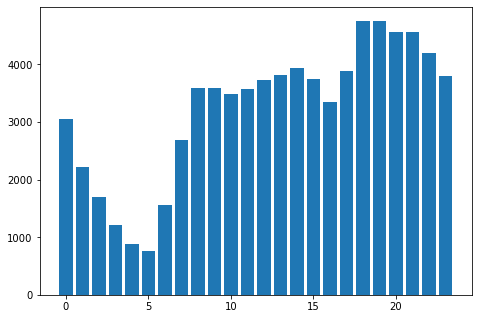

In [199]:
def most_popular_hour():
    temp = yellow_taxi.groupby('hour').count()
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    hour = range(24)
    rides = temp['distance']
    ax.bar(hour,rides)
    plt.show()
most_popular_hour()

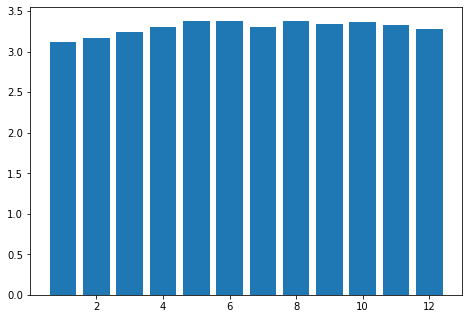

In [230]:
def average_dist_per_month():
    def month_extract(x):
        return x[5:7]
    temp1 = yellow_taxi
    temp2 = uber
    temp3 = pd.DataFrame()
    temp1['month'] = temp1[['pickup_datetime']].apply(lambda x: int(month_extract(*x)), axis=1)
    temp2['month'] = temp2[['pickup_datetime']].apply(lambda x: int(month_extract(*x)), axis=1)
    d1 = temp1.groupby('month').mean().distance
    d2 = temp2.groupby('month').mean().distance
    avg = [(x + y)/2 for x, y in zip(d1, d2)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    month = range(1,13)
    ax.bar(month,avg)
    plt.show()
average_dist_per_month()

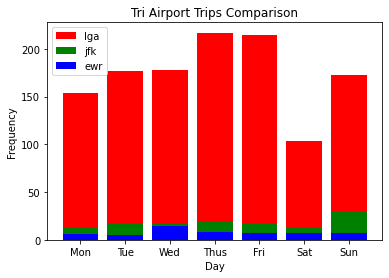

In [39]:
def tri_airport():
    # add date
    update = yellow_taxi
    update['day'] = yellow_taxi[['pickup_datetime']].apply(lambda x: day_conv(*x), axis = 1)
    # seperate data by different airport
    lga = update
    lga = lga.loc[(lga['dropoff_longitude'] > -73.8916) & (lga['dropoff_longitude'] < -73.8566)]
    lga = lga.loc[(lga['dropoff_latitude'] > 40.7618) & (lga['dropoff_latitude'] < 40.7745)]

    jfk = update
    jfk = jfk.loc[(jfk['dropoff_longitude'] > -73.8209) & (jfk['dropoff_longitude'] < -73.7272)]
    jfk = jfk.loc[(jfk['dropoff_latitude'] > 40.6499) & (jfk['dropoff_latitude'] < 40.6649)]

    ewr = update
    ewr = ewr.loc[(ewr['dropoff_longitude'] > -74.2040) & (ewr['dropoff_longitude'] < -74.1525)]
    ewr = ewr.loc[(ewr['dropoff_latitude'] > 40.6676) & (ewr['dropoff_latitude'] < 40.7255)]
    # helper function, reorganize the day
    def regroup(x):
        temp = []
        temp.append(x[1])
        temp.append(x[5])
        temp.append(x[6])
        temp.append(x[4])
        temp.append(x[0])
        temp.append(x[2])
        temp.append(x[3])
        return temp

    X = ['Mon', 'Tue', 'Wed', 'Thus', 'Fri', 'Sat', 'Sun']

    y = regroup(lga.groupby('day').count()['hour'])
    z = regroup(jfk.groupby('day').count()['hour'])
    w = regroup(ewr.groupby('day').count()['hour'])

    plt.bar(X, y, color='r', label='lga')
    plt.bar(X, w, color='g', label='jfk')
    plt.bar(X, z, color='b', label='ewr')

    plt.xlabel("Day")
    plt.ylabel("Frequency")
    plt.title("Tri Airport Trips Comparison")

    plt.legend()

    plt.show()
tri_airport()

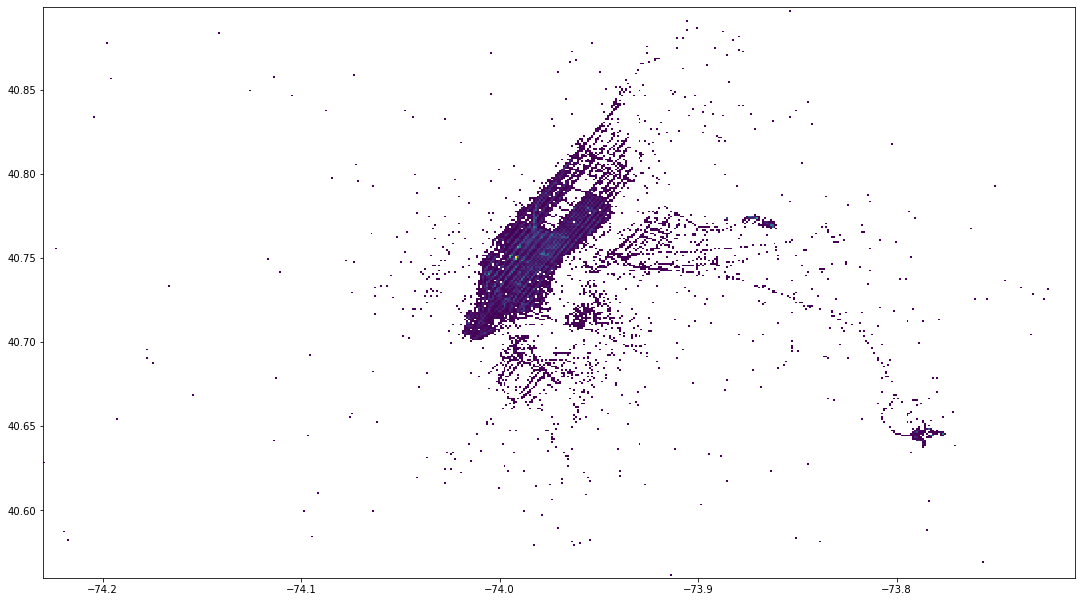

In [51]:
def heatmap():
    x = yellow_taxi['pickup_longitude']
    y = yellow_taxi['pickup_latitude']


    plt.hist2d(x,y, bins=[np.arange(-74.23,-73.71,0.001),np.arange(40.56,40.90,0.001)], cmin = 1)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()
heatmap()

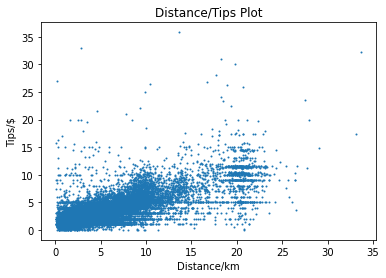

In [32]:
def dist_tips():
    tips = yellow_taxi
    tips = tips.loc[(tips['tips'] > 0) & (tips['tips'] < 40)]
    tips = tips.loc[(tips['distance'] > 0.1)]

    x = tips['distance']
    y = tips['tips']

    plt.scatter(x,y, s = 1)

    plt.xlabel("Distance/km")
    plt.ylabel("Tips/$")
    plt.title("Distance/Tips Plot")


    plt.show()
dist_tips()